In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.linalg import eigh   #返回复数Hermitian(共轭对称)或实对称矩阵的特征值和特征向量 #Eigenvalues ​​and eigenvectors
 

In [42]:
x = np.linspace(0.0, 1.0, 51)
bcs = [(0, 0.0), (len(x)-1, 0.0)]

In [43]:
num_nodes = len(x)
num_dofs = num_nodes
num_elts = num_nodes - 1

In [44]:
def beam(num_elems):
    restrained_dofs = [1, 0]
	#restrained_dofs = [1, 0, -2, -1]
 
    l = 1.0 / num_elems
    Cm = 1.0   # rho.A
    Ck = 1.0   # E.I

	# element mass and stiffness matrices
    m = np.array([[156, 22*l, 54, -13*l],
				  [22*l, 4*l*l, 13*l, -3*l*l],
				  [54, 13*l, 156, -22*l],
				  [-13*l, -3*l*l, -22*l, 4*l*l]]) * Cm * l / 420

    k = np.array([[12, 6*l, -12, 6*l],
				  [6*l, 4*l*l, -6*l, 2*l*l],
				  [-12, -6*l, 12, -6*l],
				  [6*l, 2*l*l, -6*l, 4*l*l]]) * Ck / l**3

	# construct global mass and stiffness matrices
    M = np.zeros((2*num_elems+2,2*num_elems+2))
    K = np.zeros((2*num_elems+2,2*num_elems+2))

	# for each element, change to global coordinates
    for i in range(num_elems):
        M_temp = np.zeros((2*num_elems+2,2*num_elems+2))
        K_temp = np.zeros((2*num_elems+2,2*num_elems+2))
        M_temp[2*i:2*i+4, 2*i:2*i+4] = m    #切片赋值 
        K_temp[2*i:2*i+4, 2*i:2*i+4] = k    #Slice assignment
        M += M_temp
        K += K_temp

	# remove the fixed degrees of freedom
    for dof in restrained_dofs:
        for i in [0,1]:
            M = np.delete(M, dof, axis=i)       #删去已知自由度的行和列
            K = np.delete(K, dof, axis=i)

    evals, evecs = la.eig(K,M)
    #evals, evecs = eigh(K,M)    #返回复数Hermitian(共轭对称)或实对称矩阵的特征值和特征向量
    frequencies = np.sqrt(evals)
    return M, K, frequencies, evals, evecs 


In [ ]:
# def gen_mesh():
#     """
#     Return nodes, DOF, and elements.

#     Arguments
#         prob  Problem instance  问题实例

#     Returns
#         dofs   List of DOF instances
#         nodes  List of Node instances
#         elts   List of Element instances
#         N      Number of degrees of freedom (total)
#         N1     Number of unconstrained degrees of freedom
#         N2     Number of constrained degrees of freedom (BCs)
#         idx1   Scalar eq numbers (constrained) (1-D NumPy arrary)
#         idx2   Scalar eq numbers (unconstrained) (1-D NumPy arrary)
#     """
#     # num_nodes = len(prob.x)
#     # num_dofs = num_nodes
#     # num_elts = num_nodes - 1

#     dofs = []
#     for i in range(num_dofs):
#         dofs.append(DOF(i, None))
#     for i, bc in bcs:
#         dofs[i].bc = bc

#     nodes = []
#     for i in range(num_nodes):
#         nodes.append(Node(i, x[i], dofs[i]))

#     elts = []
#     for i in range(num_elts):
#         elts.append(Element(i, [nodes[i], nodes[i+1]]))

#     idx1 = []
#     idx2 = []
#     for dof in dofs:
#         if dof.bc is None:
#             idx1.append(dof.number)
#         else:
#             idx2.append(dof.number)
#     idx1 = np.array(idx1)
#     idx2 = np.array(idx2)

#     N = len(dofs)
#     N1 = len(idx1)
#     N2 = len(idx2)

#     return dofs, nodes, elts, N, N1, N2, idx1, idx2, num_nodes
# gen_mesh()

In [45]:
M, K, frequencies, evals, evecs = beam(num_elts)

idx = np.argsort(evals)  #返回从小到大的 下标索引
evals = evals[idx]
evecs = evecs[:,idx]
omega = np.sqrt(np.real(evals))

# Phi = np.zeros((N,N1))

In [46]:
frequencies

array([1.49694238e+05+0.j, 1.25305439e+05+0.j, 1.24729602e+05+0.j,
       1.23785650e+05+0.j, 1.22495882e+05+0.j, 1.20889076e+05+0.j,
       1.18998589e+05+0.j, 1.16860481e+05+0.j, 1.14511803e+05+0.j,
       1.11989171e+05+0.j, 1.09327643e+05+0.j, 1.06559903e+05+0.j,
       1.03715727e+05+0.j, 1.00821689e+05+0.j, 9.79010636e+04+0.j,
       9.49738841e+04+0.j, 9.20571005e+04+0.j, 8.91648149e+04+0.j,
       8.63085547e+04+0.j, 8.34975629e+04+0.j, 8.07390886e+04+0.j,
       7.80386643e+04+0.j, 7.54003638e+04+0.j, 7.28270361e+04+0.j,
       7.03205128e+04+0.j, 6.78817907e+04+0.j, 6.55111893e+04+0.j,
       6.32084863e+04+0.j, 6.09730314e+04+0.j, 5.88038438e+04+0.j,
       5.66996924e+04+0.j, 5.46591642e+04+0.j, 5.26807195e+04+0.j,
       5.07627397e+04+0.j, 4.89035664e+04+0.j, 4.71015357e+04+0.j,
       4.53550078e+04+0.j, 4.36623968e+04+0.j, 4.20222004e+04+0.j,
       4.04330366e+04+0.j, 3.88936921e+04+0.j, 3.74031972e+04+0.j,
       3.59609485e+04+0.j, 3.45669328e+04+0.j, 3.32221636e+04+

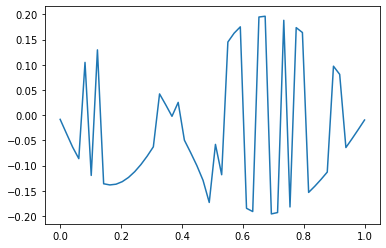

In [47]:
# dis=evecs[::2,-1]
xx=np.linspace(0,1,50)
plt.plot(xx,evecs[1,::2])